In [1]:
print("Hello World")

Hello World


In [3]:
# Import libraries
import pandas as pd

# Load the uploaded files
train_df = pd.read_csv("Train.csv")
pop_density_df = pd.read_csv("uscitypopdensity.csv")

# Display first few rows and basic info
train_info = train_df.info()
train_head = train_df.head()
pop_density_info = pop_density_df.info()
pop_density_head = pop_density_df.head()

# Check missing values
train_missing = train_df.isnull().sum()
pop_density_missing = pop_density_df.isnull().sum()

(train_info, train_head, train_missing, pop_density_info, pop_density_head, pop_density_missing)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 6 columns):
 #   Column                                    Non-

(None,
    ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
 0   1               D           Flight                    4                2   
 1   2               F           Flight                    4                5   
 2   3               A           Flight                    2                2   
 3   4               B           Flight                    3                3   
 4   5               C           Flight                    2                2   
 
    Cost_of_the_Product  Prior_purchases Product_importance Gender  \
 0                  177                3                low      F   
 1                  216                2                low      M   
 2                  183                4                low      M   
 3                  176                4             medium      M   
 4                  184                3             medium      F   
 
    Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
 0                44    

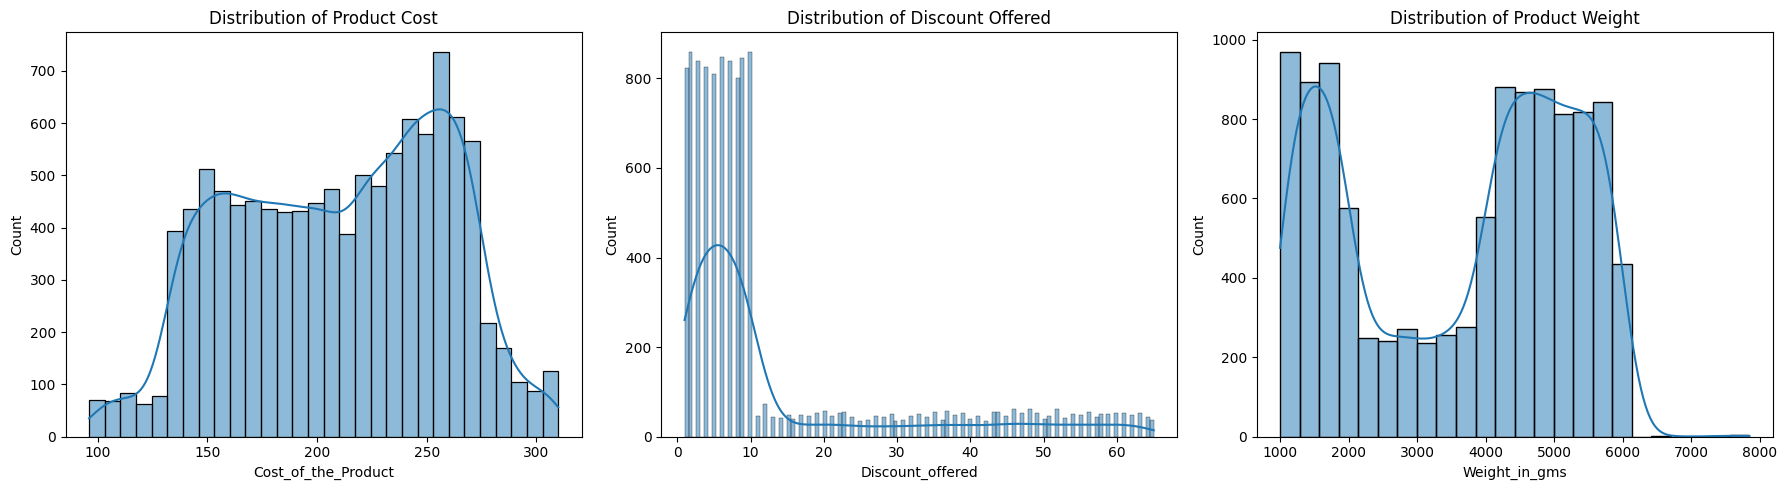

(Warehouse_block
 F    3666
 D    1834
 A    1833
 B    1833
 C    1833
 Name: count, dtype: int64,
 Mode_of_Shipment
 Ship      7462
 Flight    1777
 Road      1760
 Name: count, dtype: int64,
 Product_importance
 low       5297
 medium    4754
 high       948
 Name: count, dtype: int64,
 Gender
 F    5545
 M    5454
 Name: count, dtype: int64,
 Reached.on.Time_Y.N
 1    6563
 0    4436
 Name: count, dtype: int64,
 Reached.on.Time_Y.N         0         1
 Warehouse_block                        
 A                    0.413530  0.586470
 B                    0.397709  0.602291
 C                    0.403164  0.596836
 D                    0.402399  0.597601
 F                    0.401528  0.598472,
 Reached.on.Time_Y.N         0         1
 Mode_of_Shipment                       
 Flight               0.398424  0.601576
 Road                 0.411932  0.588068
 Ship                 0.402439  0.597561)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic value counts for categorical columns
warehouse_counts = train_df['Warehouse_block'].value_counts()
shipment_mode_counts = train_df['Mode_of_Shipment'].value_counts()
product_importance_counts = train_df['Product_importance'].value_counts()
gender_counts = train_df['Gender'].value_counts()
reached_counts = train_df['Reached.on.Time_Y.N'].value_counts()

# Plot: Cost, Discount, Weight
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(train_df['Cost_of_the_Product'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Product Cost')

sns.histplot(train_df['Discount_offered'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Discount Offered')

sns.histplot(train_df['Weight_in_gms'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Product Weight')

plt.tight_layout()
plt.show()

# Delay rate by warehouse and shipping mode
delay_by_warehouse = train_df.groupby('Warehouse_block')['Reached.on.Time_Y.N'].value_counts(normalize=True).unstack().fillna(0)
delay_by_mode = train_df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].value_counts(normalize=True).unstack().fillna(0)

(warehouse_counts, shipment_mode_counts, product_importance_counts, gender_counts, reached_counts, delay_by_warehouse, delay_by_mode)


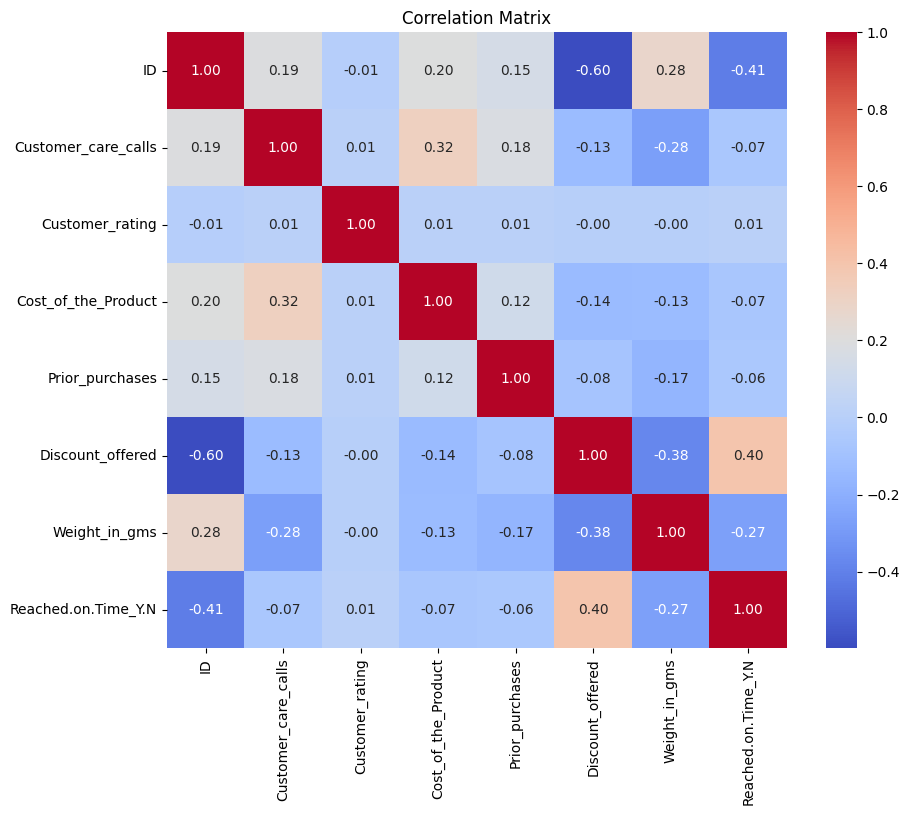

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


In [5]:
# Compute correlation matrix for numerical columns
correlation_matrix = train_df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

correlation_matrix


📊 Key insights:

Reached.on.Time_Y.N vs. Discount Offered:
→ +0.40 correlation → Higher discounts seem linked to more on-time deliveries.
(This may reflect promotions to clear stock quickly.)

Reached.on.Time_Y.N vs. Weight in gms:
→ -0.27 correlation → Heavier packages are slightly more likely to be delayed.

Reached.on.Time_Y.N vs. Customer Care Calls:
→ Weak negative: -0.06 → More care calls might hint at issues but it’s weak.

Reached.on.Time_Y.N vs. Cost_of_the_Product:
→ Weak: -0.07 → Expensive items don’t have clear impact on delays.

Reached.on.Time_Y.N vs. Prior Purchases:
→ Weak: -0.05



In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
pop_features = pop_density_df[['2016 Population', 
                               'Population Density (Persons/Square Mile)', 
                               'Land Area (Square Miles)']]

# Scale the features
scaler = StandardScaler()
pop_scaled = scaler.fit_transform(pop_features)

# Run KMeans with 3 clusters: High, Medium, Low potential
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pop_scaled)

# Add clusters back to the DataFrame
pop_density_df['Cluster'] = clusters

# Find which cluster is "high potential": highest avg population & density
cluster_summary = pop_density_df.groupby('Cluster')[
    ['2016 Population', 'Population Density (Persons/Square Mile)']
].mean().sort_values(by=['2016 Population', 'Population Density (Persons/Square Mile)'], ascending=False)

# Get cities in the best cluster
high_potential_cluster = cluster_summary.index[0]
high_potential_cities = pop_density_df[pop_density_df['Cluster'] == high_potential_cluster]

# Show top 10 high-potential cities by population
top_10_cities = high_potential_cities.sort_values(by='2016 Population', ascending=False).head(10)

(cluster_summary, top_10_cities[['City', 'State', '2016 Population', 'Population Density (Persons/Square Mile)', 'Land Area (Square Miles)']])


(         2016 Population  Population Density (Persons/Square Mile)
 Cluster                                                           
 2           8.537673e+06                              28211.000000
 1           1.001443e+06                               3134.785714
 0           1.207494e+05                               4252.459310,
        City      State  2016 Population  \
 0  New York   New York          8537673   
 
    Population Density (Persons/Square Mile)  Land Area (Square Miles)  
 0                                     28211                       303  )

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# 1. Clean column names
walmart_data.columns = walmart_data.columns.str.strip()

# 2. Drop only necessary missing values
walmart_cleaned = walmart_data.dropna(subset=['Order Date', 'Product Category', 'Sales'])

# 3. Confirm valid categories
print("Available categories:", walmart_cleaned['Product Category'].unique())

# 4. Choose a valid category from the list above
category = 'Office Supplies'  # or 'Furniture' or 'Technology'

# 5. Filter for category
cat_data = walmart_cleaned[walmart_cleaned['Product Category'] == category]

# 6. Prepare data for Prophet
cat_data['Order Date'] = pd.to_datetime(cat_data['Order Date'])  # convert date
daily_sales = cat_data.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales.columns = ['ds', 'y']
daily_sales = daily_sales[daily_sales['y'] > 0].reset_index(drop=True)  # ✅ FIXED

# Check if data is sufficient
print(daily_sales.head())
print(f"Data points for Prophet: {len(daily_sales)}")

# 7. Train Prophet model
model = Prophet()
model.fit(daily_sales)

# 8. Make future predictions
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# 9. Plot forecast
fig = model.plot(forecast)
plt.title(f"30-Day Sales Forecast for {category}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# 10. Optional: View components (trend, seasonality)
model.plot_components(forecast)
plt.show()


ModuleNotFoundError: No module named 'prophet'